# Problem set 4


[your name] Luis Rubén González Márquez

[working title of the project] Inherited cultural capital and income for non-whites in the US

[date] 03/31/2020

## 1. Visually assess heteroscedasticity [1 pt]

    A. Create a scatterplot of a dependent variable and independent variable of interest from a dataset of your choice.
    
    B. Include a fitted line with an area graph of the confidence interval for the prediction.
    
    C. Write a couple sentences describing how the distribution of the data in the graph does or does not appear to be heteroscedastic.
    **The distribution of the plot seems to indicate an heteroscedastic distribution toward the second decade of education of the father and from 0 to 70,000 dollars of income, and thus skewed to the left. The fitted line with confidence interval also points to the variability of income at the extreme parts of the distribution: whille in the lower years of education it might be related to the fewer cases, higher values of father's education presented accute differences in the outcomes of income. 

In [28]:
clear
qui use GSS2018w6.dta, clear
ds, varwidth (32)
qui drop if race==1
qui drop if realrinc==.i
qui drop if paeduc==.d
qui drop if paeduc==.i




age       educ      paeduc    sex       race      yearsjob  realrinc  PASEI10






In [29]:
%set graph_format svg

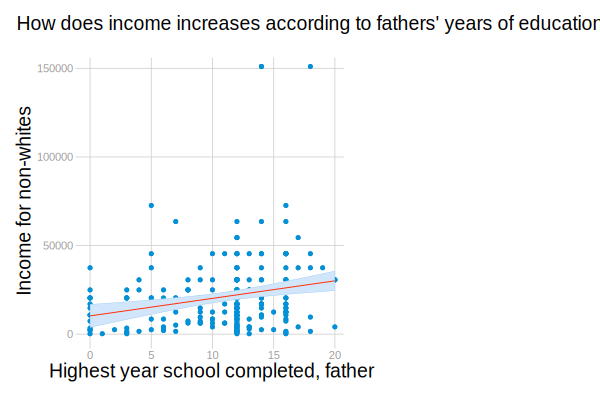

In [30]:
tw (scatter realrinc paeduc) ///
(lfitci realrinc paeduc), ///
ytitle(Income for non-whites, size(large)) ///
xtitle(,size(large)) legend(off) scheme(538w) ///
title("How does income increases according to fathers' years of education?" " ", span size(large)) ///
aspect(1, place(west))

## 2. Test for heteroscedasticity [1 pt]

    A. Do a Breusch-Pagan postestimation test for heteroscedasticity in your dependent variable and independent variable relationship.

    B. Reestimate the regression after logging the DV or IV if appropriate and do another Breusch-Pagan test. Does logging reduce heteroscedasticity? **The Chi square value of the heteroscedasticity test is reduced significantly with logging. However, it falls into the rejection zone for the null hypothes that there is no heteroskedasticity and variance is constant, so there is still a level of heteroskedasticity.

In [31]:
qui regress realrinc paeduc 
estat hettest




Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of realrinc

         chi2(1)      =    30.49
         Prob > chi2  =   0.0000


In [32]:
gen realrincln = log(realrinc)
qui regress realrincln paeduc 
estat hettest





Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of realrincln

         chi2(1)      =     2.37
         Prob > chi2  =   0.1235


## 3. Boot strap your standard errors [1 pt.]

    A. Quietly reestimate your regression coefficient with convential OLS and store the results.
    
    B. Quietly reestimate your regression with bootstrapped standard errors and store the results.
    
    C. Use esttab to output the results of the two models and tell us how the bootstrap standard erros differ from the conventional results.
    **The comparison between the standard error of the conventional regression and the regression of the boostrap shows a reduction. The standard error is in the former of 278.13 (approximately more or less 545 dollars) and in the latter 273.84 (more or less 536 dollars).
    
    D. Explain in your own words what the bootstrap procedure is doing and why it yields similar or different standard errors to the convential model.
    **The bootstrap model generates calculates the values of the regression from randomly resampling from the same pool of observations, in this case 50 observations a 1,0000 times. The result is, following the principles of sampling theory, that the sampling distribution will achieve normality if sampling is repeated infinitely (or for practical purposes, a large number of times). Thus, the confidence intervals and the error are evenly distributed at the extremes of the bell and heterdskadisticity is reduced without affecting the coefficient.  

In [38]:
est clear
qui regress realrinc paeduc
qui eststo 
quietly bootstrap _b[paeduc] , rep(1000) nodots : ///
   reg realrinc paeduc
qui eststo

In [39]:
%html
esttab, html ///
mlabels("OLS" "Bootstrap") ///
collabels(none) drop(_cons) ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001) 

This front-end or document format cannot display HTML

## 4. Estimate robust standard errors [1 pt]

    A. Reestimate your model with robust standard errors and store the results.
    
    B. Use esttab to output the results of the robust model alongside the conventional and bootstrap models and explain how the the results compare in 1 or 2 sentences.
    The results of the robust model also reduce the standard error when compared to the conventional OLS model, with a value of 270.62 (approximately more or less 530 dollars). It is worth noting that the result is also smaller than the bootstrap model (although, in other ocassions it was greater, since bootstrap values change everytime that model is run).  
    
    C. In your own words, explain how the robust standard errors procedure differs from conventional procedures.
    **The robust standard error reduces the weight of the extreme values in the distribution (or conversely increases the weight of values closer to the mean), which includes values with higher leverage, high influence or outliers. Thus, it reduced this values' exagerated effect of increasing standard errors: in this case, for instance the 150,000 dollars of income (see Scatterplot). Thus, it allows to focus the values of the test and the analysis over the observations that fulfill the normal distribution assumption.   

In [40]:
qui regress realrinc paeduc, ro
qui eststo 

In [41]:
%html
esttab, html ///
mlabels("OLS" "Bootstrap" "Robust") ///
collabels(none) drop(_cons) ///
cells(b(star fmt(2)) se(fmt(2) par)) ///
starlevels(^ .1 * .05 ** .01 *** .001) 

This front-end or document format cannot display HTML

## 5. Cluster robust standard errors [1 pt]

    A. Explain why or why not your model should be estimated with cluster robust standard errors. If yes, what is the clustering unit and why?
    **Unfortunately, the dataset does not contain a variable that allows a random clustering of observations that justifies using this model. The closest variable is age but it is to skewed among respondents.  
    
    B. If yes, reestimate your model with cluster robust standard errors and use esttab to output the results of the robust model alongside your other models and explain how the the results compare in 1 or 2 sentences.
    
    C. Write a couple sentences explaining what is the best method of standard error estimation for your models and why.
    **In this analysis, the best method for standard error estimation probed to be robust standard error. Against the conventional model, robust standard error reduces the gap of the confidence intervals of the coefficient by providing more leverage to the values fulfilling the normal distribution assumption (in the test and in analysis). In comparison to bootstraping, the advantages of robust standard error is, first, the economy of operations either in coding and computational demand, and also the constant value of the robust standard error model every time is run against the random changes in the error values of the boostrap model each time the regression is run. Finally, it is not always possible to compare robust standard errors to robust cluster standard error (as it was in this case) since for the latter is necessary a dataset that allows to group observations according to a theoreticaly justified (and in addition, maybe, also normaly distributed) principle. 